In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy

In [49]:
#sampling
np_x1 = np.random.normal(3.0,2.0,(1000000,1))
np_x2 = np.random.normal(-1.0,2.0,(1000000,1))
np_noise = np.random.normal(0.0,math.sqrt(2),(1000000,1))
np_x0 = np.ones((1000000,1))

In [50]:
#setting up sampled data
np_t= np.column_stack((np_x0,np_x1))
np_X= np.column_stack((np_t,np_x2))
print(np_X)
dims = np.shape(np_X)[1]
print(dims)
m = np.shape(np_X)[0]
print(m) 

[[ 1.          3.1702228  -2.33390796]
 [ 1.          2.12388906 -0.54902068]
 [ 1.          1.93969678 -2.42340234]
 ...
 [ 1.          0.91767964  0.28645461]
 [ 1.          0.38968487  1.31533124]
 [ 1.          4.89967065  3.50655403]]
3
1000000


In [51]:
#getting Y for sampled data after adding noise
weight = np.array([[3,1,2]],dtype=float).T
np_Y = np.ones((1000000,1))
mat_temp = np.dot(np_X,weight)
for i in range(1000000):
    np_Y[i]= mat_temp[i]+np_noise[i]
print(np_Y)

[[ 2.04858996]
 [ 4.78592753]
 [ 2.18166342]
 ...
 [ 3.8323911 ]
 [ 6.94759937]
 [13.16195484]]


In [52]:
theta = np.array([[0,0,0]],dtype=float).T


In [53]:
def cost_fn(np_X,np_Y,weight,batch_no, bsize):
    np_ret = np.zeros((bsize,1))
    ll = bsize*batch_no
    rl = bsize*(batch_no+1)
    for i in range(ll,rl):
        np_temp=(np.dot(np_X[i],weight))
        s=0
        s= (np_Y[i]-np_temp)**2
        s /= (2*bsize)
        np_ret[i-ll]=s
    return np_ret


In [59]:
# testing for matrix products
print(weight)
print(np_X[0])
print(np.dot(np_X[0],weight))
print(np_Y[0])
print(cost_fn(np_X,np_Y,weight,0,1))
print(-9%9)
print(np.shape(weight))

[[3.]
 [1.]
 [2.]]
[ 1.          3.1702228  -2.33390796]
[1.50240689]
[2.04858996]
[[0.14915797]]
0
(3, 1)


In [55]:
def loss_gradient_batch(np_X,np_Y,weight,bsize, num, batch_no):
    ll = bsize*batch_no
    rl = bsize*(batch_no+1)
    np_cost = np.zeros((bsize,1))
    s=0
    for i in range(ll,rl):
        s += (np_Y[i]- np.dot(np_X[i],weight))*np_X[i][num]
    return s
        
    

In [56]:
#testing Gradient
print(loss_gradient_batch(np_X,np_Y,weight,1,0,0))

[0.54618307]


In [72]:
def sgd(np_X,np_Y,weight,alpha,epochs,dims,bsize,m):
    grad = np.zeros((dims,1))
    np_cost = np.zeros((10,1))
    num_batch = m/bsize
    l = num_batch/10
    step_theta = np.zeros((int(num_batch),dims))
    print(np.shape(step_theta))
    np_c_plot = np.zeros((int(l),1))
    s=0
    for epoch in range(epochs):
        for i in range((int(num_batch))):
                #print(i)
                step_theta[i]=theta.ravel()
                np_cost[(i%10)] += (cost_fn(np_X,np_Y,weight,i,bsize).mean()*bsize)
                for j in range(dims):
                    grad[j]= loss_gradient_batch(np_X,np_Y,theta,bsize,j,i)
                for j in range(dims):
                    theta[j]= theta[j]+alpha*grad[j]
                if (i-9)%10==0 :
                    #print(i,"huhh")
                    np_c_plot[int((i)/10)] = np_cost.mean()
                    np_cost = np.zeros((10,1))
                
    return theta,np_c_plot,step_theta
            
                
            

In [73]:
bsize = 100
p = (1000000/bsize)
p /=10
k = int(p)
step_weight = np.zeros((k,dims))
np_c_plot=np.zeros((k,1))
theta,np_c_plot,step_weight = sgd(np_X,np_Y,theta,0.001,1,dims,bsize,m)

(10000, 3)


In [74]:
print(weight)
print(weight.ravel())

[[3.]
 [1.]
 [2.]]
[3. 1. 2.]


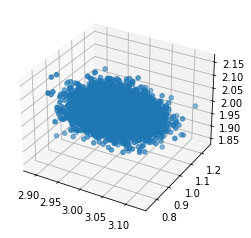

In [76]:
#print(step_weight)
ax = plt.axes(projection='3d') 
ax.scatter3D(step_weight[:,0],step_weight[:,1],step_weight[:,2])


ax = plt.axes(projection='3d')
ax.plt3D(step_weight[:,0],step_weight[:,1],step_weight{:,2})

In [77]:
theta_b_100=copy.deepcopy(theta)
print(theta)

[[3.01343604]
 [0.96289431]
 [2.00434048]]


(1000, 1)
(1000,)


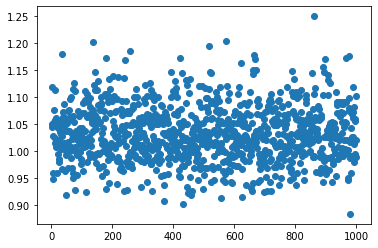

In [78]:
print(np.shape(np_c_plot))
np_x = np.linspace(1,k,k)
print(np.shape(np_x))
plt.scatter(np_x,np_c_plot)

In [80]:
#batch_size = 10
bsize = 10
p = (1000000/bsize)
p /=10
k = int(p)
np_c_plot=np.zeros((k,1))
step_weight = np.zeros((k,dims))
theta,np_c_plot,step_weight = sgd(np_X,np_Y,theta,0.001,1,dims,bsize,m)
theta_b_10 = copy.deepcopy(theta)
print(theta)

(100000, 3)
[[3.01756995]
 [0.96830725]
 [2.01057452]]


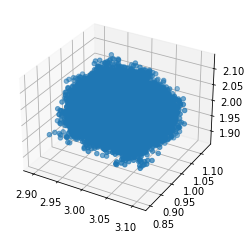

In [83]:
ax = plt.axes(projection='3d')
ax.scatter3D(step_weight[:,0],step_weight[:,1],step_weight[:,2])

In [84]:
#batch_size = 1
bsize = 1
p = (1000000/bsize)
p /=10
k = int(p)
np_c_plot=np.zeros((k,1))
step_weight = np.zeros((k,dims))
theta,np_c_plot,step_weight = sgd(np_X,np_Y,theta,0.001,1,dims,bsize,m)
theta_b_1 = copy.deepcopy(theta)
print(theta)

(1000000, 3)
[[3.01769645]
 [0.9682927 ]
 [2.00807632]]


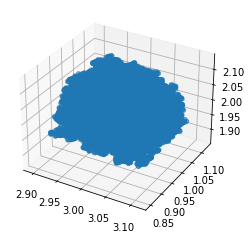

In [85]:
ax = plt.axes(projection='3d')
ax.scatter3D(step_weight[:,0],step_weight[:,1],step_weight[:,2])

In [86]:
# read csv
df_data = pd.read_csv('q2test.csv')
np_test = df_data.to_numpy()
print(np.shape(np_test))

(10000, 3)


In [87]:
#2.3 error calculations
np_temp_y = np.dot(np_test,weight)
np_temp_x100 = np.dot(np_test,theta_b_100)
np_temp_x10 = np.dot(np_test,theta_b_10)
np_temp_x1 = np.dot(np_test,theta_b_1)
l_b_100 = np.dot(np.transpose((np_temp_y-np_temp_x100)),(np_temp_y-np_temp_x100))
l_b_100 /= 2*10000
l_b_10 = np.dot(np.transpose((np_temp_y-np_temp_x10)),(np_temp_y-np_temp_x10))
l_b_10 /= 2*10000
l_b_1 = np.dot(np.transpose((np_temp_y-np_temp_x1)),(np_temp_y-np_temp_x1))
l_b_1 /= 2*10000
print(l_b_100)
print(l_b_10)
print(l_b_1)

[[0.05884473]]
[[0.04839034]]
[[0.04821542]]
